### Accessing JSON data through an API
#### Yelp Fusion API
1. Obtain a Yelp Fusion Developer Account here: https://fusion.yelp.com/ Use your student email and access your email to verify your account.
2. Create a Yelp Fusion App.  Login to your Yelp developer account, and select Manage App under General.  Enter an App Name (such as Review Sentiments), your email and a description. 
3. Save your client id and api key in a separate (private) .py file.  This script assumes that this information is saved in yelpkeys.py with the variables client_id and api_key respectively.
4. Import your id and key into your notebook by importing the file containing this private information.


In [25]:
import requests
import yelpkeys  # file where client_id and api_key is defined with user's private app information
from textblob import TextBlob

In [26]:
APIKEY = yelpkeys.api_key
headers = {'Authorization': 'Bearer %s' % yelpkeys.api_key,}

In [27]:
"""
Yelp Fusion API code sample.
This program demonstrates the capability of the Yelp Fusion API
by using the Search API to query for businesses by a search term and location,
and the Business API to query additional information about the top result
from the search query.
Please refer to https://docs.developer.yelp.com/docs/get-started for the API
documentation.
This program requires the Python requests library, which you can install via:
`pip install -r requirements.txt`.
Sample usage of the program:
`python sample.py --term="bars" --location="San Francisco, CA"`
"""
from __future__ import print_function

import argparse
import json
import pprint
import requests
import sys
import urllib


# This client code can run on Python 2.x or 3.x.  Your imports can be
# simpler if you only need one of those.
try:
    # For Python 3.0 and later
    from urllib.error import HTTPError
    from urllib.parse import quote
    from urllib.parse import urlencode
except ImportError:
    # Fall back to Python 2's urllib2 and urllib
    from urllib2 import HTTPError
    from urllib import quote
    from urllib import urlencode


# Yelp Fusion no longer uses OAuth as of December 7, 2017.
# You no longer need to provide Client ID to fetch Data
# It now uses private keys to authenticate requests (API Key)
# You can find it on
# https://www.yelp.com/developers/v3/manage_app
API_KEY= yelpkeys.api_key


# API constants, you shouldn't have to change these.
API_HOST = 'https://api.yelp.com'
SEARCH_PATH = '/v3/businesses/search'
BUSINESS_PATH = '/v3/businesses/'  # Business ID will come after slash.


# Defaults for our simple example.
DEFAULT_TERM = 'dinner'
DEFAULT_LOCATION = 'New Orleans, LA'
SEARCH_LIMIT = 20


def request(host, path, api_key, url_params=None):
    """Given your API_KEY, send a GET request to the API.
    Args:
        host (str): The domain host of the API.
        path (str): The path of the API after the domain.
        API_KEY (str): Your API Key.
        url_params (dict): An optional set of query parameters in the request.
    Returns:
        dict: The JSON response from the request.
    Raises:
        HTTPError: An error occurs from the HTTP request.
    """
    url_params = url_params or {}
    url = '{0}{1}'.format(host, quote(path.encode('utf8')))
    headers = {
        'Authorization': 'Bearer %s' % api_key,
    }

    print(u'Querying {0} ...'.format(url))

    response = requests.request('GET', url, headers=headers, params=url_params)

    return response.json()


def search(api_key, term, location):
    """Query the Search API by a search term and location.
    Args:
        term (str): The search term passed to the API.
        location (str): The search location passed to the API.
    Returns:
        dict: The JSON response from the request.
    """

    url_params = {
        'term': term.replace(' ', '+'),
        'location': location.replace(' ', '+'),
        'limit': SEARCH_LIMIT
    }
    return request(API_HOST, SEARCH_PATH, api_key, url_params=url_params)


def get_business(api_key, business_id):
    """Query the Business API by a business ID.
    Args:
        business_id (str): The ID of the business to query.
    Returns:
        dict: The JSON response from the request.
    """
    business_path = BUSINESS_PATH + business_id

    return request(API_HOST, business_path, api_key)


def query_api(term, location):
    """Queries the API by the input values from the user.
    Args:
        term (str): The search term to query.
        location (str): The location of the business to query.
    """
    response = search(API_KEY, term, location)

    businesses = response.get('businesses')

    if not businesses:
        print(u'No businesses for {0} in {1} found.'.format(term, location))
        return

    business_id = businesses[0]['id']

    print(u'{0} businesses found, querying business info ' \
        'for the top result "{1}" ...'.format(
            len(businesses), business_id))
    response = get_business(API_KEY, business_id)

    print(u'Result for business "{0}" found:'.format(business_id))
    pprint.pprint(response, indent=2)

In [28]:
response = search(API_KEY,DEFAULT_TERM, 'New Orleans, LA')

Querying https://api.yelp.com/v3/businesses/search ...


In [29]:
response

{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg',
   'alias': 'café-amelie-new-orleans-2',
   'name': 'Café Amelie',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ',
   'review_count': 3057,
   'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'},
    {'alias': 'cafes', 'title': 'Cafes'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.3,
   'coordinates': {'latitude': 29.959674166713384,
    'longitude': -90.06319415951997},
   'transactions': ['delivery'],
   'price': '$$',
   'location': {'address1': '900 Royal St',
    'address2': None,
    'address3': '',
    'city': 'New Orleans',
    'zip_code': '70116',
    'country': 'US',
    'state': 'LA',
    'display_address': ['900 Ro

In [30]:
for business in response['businesses']:
    #print(response)
    print('Business Name: ' + business['name'])
    print('Rating: ' + str(business['rating']))
    print('Review Count: ' + str(business['review_count']))
    print('Reviews: ')
    BUS_REVIEW='/v3/businesses/{}/reviews'.format(business['id'])
    #print('https://api.yelp.com/v3/businesses/{}/reviews?limit=20&sort_by=yelp_sort'.format(business['id']))
    reviews = request(API_HOST,BUS_REVIEW, API_KEY)
    for review in reviews['reviews']:
        print(' - ' + review['text'])
        # Perform sentiment analysis on the review using TextBlob
        blob = TextBlob(review['text'])
        sentiment = blob.sentiment.polarity
        if sentiment > 0:
            print('    Sentiment: Positive')
        elif sentiment < 0:
            print('    Sentiment: Negative')
        else:
            print('    Sentiment: Neutral')
        print('\n================\n\n\n')

{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch'}, {'alias': 'cafes', 'title': 'Cafes'}, {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}], 'rating': 4.3, 'coordinates': {'latitude': 29.959674166713384, 'longitude': -90.06319415951997}, 'transactions': ['delivery'], 'price': '$$', 'location': {'address1': '900 Royal St', 'address2': None, 'address3': '', 'city': 'New Orleans', 'zip_code': '70116', 'country': 'US', 'state': 'LA', 'display_address': ['900 Royal St', 'New Orleans, LA 70116']}, 'phone': '+15044128065', 'display_phone'

 - Food was amazing, staff very friendly and attentive. We sat in the outside patio very nice atmosphere. We will definitely be returning when in New Orleans.
    Sentiment: Positive




 - My daughter and I took a southern road trip (southern food tour, rather)  for spring break and it was absolutely glorious! Our last stop was Nola and while...
    Sentiment: Positive




 - If I could, this place would get an absolute 0/5. WHAT A DESPICABLE PLACE THIS IS. Based on the Yelp reviews, I wanted to give this place a try....
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categori

 - FOOD: 
The Shrimp Po Boy was literally the best po boy I've had in my life. The bread was toasted but still soft. The shrimp was cooked to perfection. The...
    Sentiment: Positive




 - Solid 4.5!

Excellent Oysters! Large!!
Get the combo platter. Best were the Rockefeller and creole oysters. 
Shrimp Po Boy was succulent. Lightly fried....
    Sentiment: Positive




 - This place was VERY busy, however the staff was fast and observant. We didn't have a long wait between being seated, ordering and receiving our...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories

 - food, service and ambience were all above and beyond! 

Brian (server) was friendly, attentive and knowledgeable. Lily (Somm) was a delight to speak with....
    Sentiment: Positive




 - What an amazing meal during a rather hectic season in the big easy. We visited MaMou on muses Thursday for dinner, and were able to dine and get out in time...
    Sentiment: Positive




 - This was my first time eating French food and I thought it was pretty interesting experience. The food may sound boring like celery heart but man I was...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057,

 - Amazing food and service. We preferred the food here over everything we tried in the French Quarter. The welcome staff was incredible. The Taste of NOLA is...
    Sentiment: Positive




 - This place was literally amazing. The service was great. We told our server that it was my birthday and he decided to give us a shot for free. This was...
    Sentiment: Positive




 - We enjoyed a tasty dinner just a few minutes from our hotel at Zesty Creole. I loved the unassuming atmosphere and took the fact that it was busy as a great...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057

 - Had a great time at Cochon ! Food was great , cracklings could have been a bit chewy! But hey tasty nonetheless! Jason Mike Wyatt!! Amazing bartender! Great...
    Sentiment: Positive




 - We can't find anything like COCHON in Hawaii so it's worth the very long 6000 miles+ 9 hrs. to get to Nola. What a great Aloha greeting and our old table...
    Sentiment: Positive




 - I solo dined here at the recommendation of a friend for the last evening of my trip. The food was fantastic! I arrived around 6:30 as a walk-in and was...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 

 - This is the best bar in the French quarter. Get their house red. I LOVE YOU GUYS!! Service amazing, ambiance amazing I love you all
    Sentiment: Positive




 - A cool and slightly hidden gem in the French quarter. Dropped in for dinner and enjoyed sitting in the beautiful courtyard. The menu had a couple of...
    Sentiment: Positive




 - order at the bar and sit wherever you like. 

the cocktails made fresh in front of you. strong. nice. dr manhattan if you want sonething straight to the...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories': [{'alias': 'breakf

 - We visited CP today for lunch.  Besides the appeal of the menu, the 25 cent martinis also caught our eye.  Our party of four absolutely loved our food...
    Sentiment: Positive




 - We had Sunday Jazz Brunch at Commander's today and it just might have been the most enjoyable 2 hours I've ever spent in a restaurant. Everything was...
    Sentiment: Positive




 - Thanks to all the positive yelp reviews, we found our way here! Upon first glance, you won't be impressed by the restaurant's façade. But, once you step...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categori

 - I visited Boutique du Vampyre and received a little postcard about this place. I saw red snapper on the menu and had to make a visit! I came around 6pm. I...
    Sentiment: Negative




 - Sometimes the idea of a place is way above the actual experience. That's kinda what we felt when we went to The Apothecary today. The hostess was so sweet...
    Sentiment: Positive




 - Probably the best professional mixologist in New Orleans (Julie) is behind the bar mixing drinks, directing traffic and babysitting the rest of the...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'cate

 - Absolutely amazing. Took my daughter two years ago when she was 7. She would not stop talking about the dip !!  Brought her back this year for her birthday...
    Sentiment: Positive




 - The ambiance, service and food quality were the best value and quality that I experienced in the French quarter. Highly recommend the Boudin, cheesy bread,...
    Sentiment: Positive




 - Get the muffuletta. 

No reservations, and I think the line might take 20ish mins so arrive early if you can!

We were strolling around the French quarter...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 30

 - I know. We're in NOLA, and we're at an Italian restaurant? Well, YES! 

Sofia Loren (hubby's first crush) was a friend of the owner's parents, so the...
    Sentiment: Positive




 - For Italian, go to Sofia. On our first night on a six-day-trip to New Orleans, we walked into Sofia on a Friday evening around 8 p.m. and got a table for...
    Sentiment: Positive




 - Excellent meal. Best Italian food we've had in a while. Pastas were perfect and the pork chop was excellent. 

Good wine list. 

Portions are on the smaller...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'c

 - Excellent food, excellent service. We try to stop at least once every time we are in town. Our favorite is the half/half shawarma plate with chicken and...
    Sentiment: Positive




 - Great food, central location. Very good price for the quality of the food and service.
    Sentiment: Positive




 - Tried this place on my trip to New Orleans. We started off with Turkish Coffee, Hummus and Veggie Grape Leaves. For mains, I had Falafel Sandwich. Food was...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Bru

 - I recently dined at Mambo's and had the pleasure of being served by Chrishante. From the moment I sat down, she provided impeccable service that truly...
    Sentiment: Positive




 - The food was to die for and the service was topnotch! Chrisanté took great care of us. Couldn't have asked for a better experience. If you're in town, be...
    Sentiment: Positive




 - Me and my boyfriend had a wonderful experience here!! Chrishante was an amazing server!
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories': [{'alias': 'breakfast_brunch', 'title': 'Breakfast & Brunch

 - The food was amazing. We had spinach articoke dip for an appetizer 
Dinner was red beans and rice with sausage
1/2 rack pork ribs with coleslaw and...
    Sentiment: Positive




 - The food was good and gave us an authentic experience of New Orleans food. The Bahama Mama was GREAT! Our server was very attentive and friendly!
    Sentiment: Positive




 - Damon was absolutely amazing the service here is top notch! It felt like we were family definitely coming back here. Make sure you try the blackened bayou...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categories': [{'

 - My husband and I were very pleased with this place. The service was great - timely, checked up on us just enough times but not too much, & friendly. 

The...
    Sentiment: Positive




 - This is such a nice little find just adjacent to Canal street. Food is flavorful and the staff is very busy (but kind). I especially enjoyed the cauliflower...
    Sentiment: Positive




 - Convenient location if you're going to a show as it is right across from the Saenger Theatre. Without a reservation on a Sunday evening, seated right away...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 30

 - Amazing Food. It's just simply amazing, classic not overdoing the plates. Just as simple and wonderful as could be. Desserts so good they will put  you...
    Sentiment: Positive




 - One of the finest restaurants I've been to in New Orleans. The food, service and ambiance are superb and the history of the building makes for an...
    Sentiment: Positive




 - This was my second time dining at Muriel's. My first time was 10 years ago. We arrived a few minutes before our reservation and only waited a couple minutes...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, 'categor

 - This was our 1st time to NOLA and we decided to try out this restaurant. It did NOT disappoint! First things first, the server Nick was AMAZING and made our...
    Sentiment: Positive




 - Nice dinner here. Cozy atmosphere. Good service but could've been a little quicker, but they seemed to have a large group in the courtyard in back that took...
    Sentiment: Positive




 - Came on a Sunday and had the jambalaya ($18.95) and a cup of gumbo ($5.95). 

Jambalaya was great. Spicy but not too overpowering. Plenty of chicken and...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 30

 - This past weekend my wife and I visited New Orleans for the first time, and we had a blast! I tell you one thing Luke was the best restaurant hands down...
    Sentiment: Positive




 - I came here for lunch while I was in New Orleans for a conference. 

It is a charming restaurant with French, German, and Cajun/Creole influence in the...
    Sentiment: Positive




 - An exquisite New Orleans dining experience.

Luke is a high price, high quality restaurant serving up delicious food from the land and sea breakfast, lunch,...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057, '

 - Everything was terrific. I'm glad I read the reviews and listened to the wait staff's recommendations. My husband and I shared the tuna crudo, oysters (2 of...
    Sentiment: Positive




 - Stopped by for lunch my first day in New Orleans and I am very happy I did. I sat at the bar and had a great conversation with the bartender, plus he gave...
    Sentiment: Positive




 - If you are looking for modern and sleek, I suggest going elsewhere. If you want a restaurant that feels like a hug from family, step in Peche's doors.
The...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 30

 - Ambiance- lively, cozy place with live music. A lot of people come alone to enjoy the good foods at the bar. A perfect place to come for a romantic date...
    Sentiment: Positive




 - This was our first visit to Irene's in conjunction with this spring's culinary expedition to New Orleans from Houston and to run in the 2024 Shamrockin Run...
    Sentiment: Positive




 - With all these incredible french influenced restaurants and cajun/creole places, who would've thought IRENE'S would slowly become my favorite restaurant in...
    Sentiment: Positive




{'businesses': [{'id': 'ww3YJXu5c18aGZXWmm00qg', 'alias': 'café-amelie-new-orleans-2', 'name': 'Café Amelie', 'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/93q9x7v19HAAGczJ5TqiwQ/o.jpg', 'is_closed': False, 'url': 'https://www.yelp.com/biz/caf%C3%A9-amelie-new-orleans-2?adjust_creative=istl9jgw2i0Hp64EIdomvQ&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=istl9jgw2i0Hp64EIdomvQ', 'review_count': 3057

 - Rampart Treehouse was one of my first stops in New Orleans. I had bookmarked it on Yelp and when I checked into my hotel, I realized it was withing walking...
    Sentiment: Positive




 - Personally, for my own taste, this place is just OK. For my other friends who love 90s alt rock, crushable beers, and pizza, they thought this place was a...
    Sentiment: Positive




 - My husband and I had just spent all of Saturday, not joking 14 hours, walking French Quarter and then some. We wanted something quick and on the way back to...
    Sentiment: Positive






### Simple code for creating a donut chart (courtesy of chatGPT)

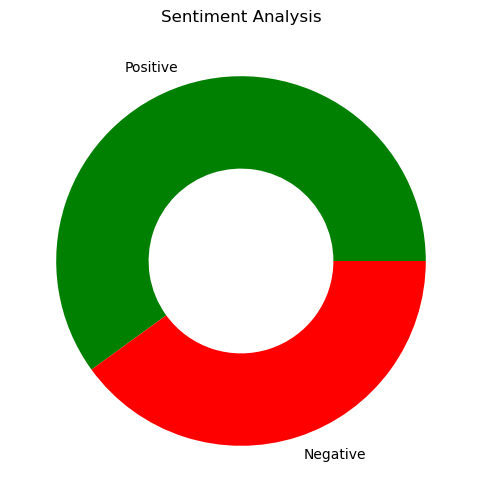

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define data
pos = 60
neg = 40
labels = ['Positive', 'Negative']
values = [pos, neg]

# Create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(values, labels=labels, wedgeprops=dict(width=0.5), colors=['green', 'red'])
ax.set_title('Sentiment Analysis')

plt.show()

In [32]:
import requests

# Replace 'YOUR_API_KEY' with your actual Yelp API key
api_key = APIKEY

# Replace 'BUSINESS_ID' with the actual Yelp business ID
business_id = 'ww3YJXu5c18aGZXWmm00qg'

url = f'https://api.yelp.com/v3/businesses/{business_id}/reviews'

headers = {
    'Authorization': f'Bearer {api_key}',
}

response = requests.get(url, headers=headers)

if response.status_code == 200:
    data = response.json()
    reviews = data.get('reviews', [])
    for review in reviews:
        print(review['text'])
else:
    print(f"Error: {response.status_code}, {response.text}")


Food was amazing, staff very friendly and attentive. We sat in the outside patio very nice atmosphere. We will definitely be returning when in New Orleans.
My daughter and I took a southern road trip (southern food tour, rather)  for spring break and it was absolutely glorious! Our last stop was Nola and while...
If I could, this place would get an absolute 0/5. WHAT A DESPICABLE PLACE THIS IS. Based on the Yelp reviews, I wanted to give this place a try....
